<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (15,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [2]:
df=pd.read_csv("car_dataset.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [8]:
df[df["Selling_Price"]>1]['Selling_Price']##Outlier diye düşünüp attığımda skorum iyileşmedi

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 222, dtype: float64

In [9]:
#df.drop(index = [51, 63, 64,82,86,93], axis = 0, inplace = True)

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


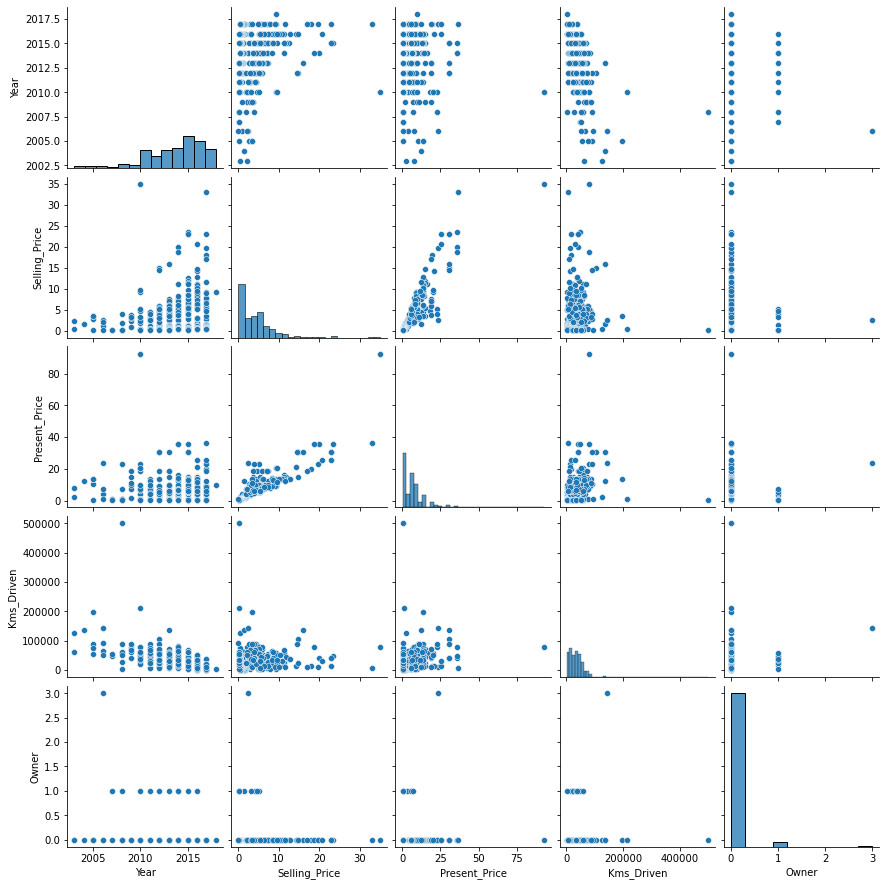

In [11]:
sns.pairplot(df)

In [12]:
df["Car_Name"].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Yamaha FZ 16                 1
Mahindra Mojo XT300          1
etios gd                     1
Bajaj Avenger 150 street     1
Hero Passion X pro           1
Name: Car_Name, Length: 98, dtype: int64

In [13]:
df["Car_Name"].sample(5)

159    Honda Activa 4G
291               brio
61         etios cross
214          grand i10
86        land cruiser
Name: Car_Name, dtype: object

In [14]:
df["Car_Name"]=df["Car_Name"].str.split(" ").str[0]

In [15]:
change_column=df["Car_Name"].value_counts()[df["Car_Name"].value_counts()<6].index


In [16]:
df["Car_Name"]=df["Car_Name"].map(lambda x: 'Other 'if x in change_column else x )

In [17]:
#df.drop("Car_Name",inplace=True,axis=1)

In [18]:
df['Age']=df.Year.map(lambda x:df.Year.max()-x)## I take the max year 0

In [19]:
df.drop("Year",inplace=True,axis=1)

In [20]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,Other,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,Other,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,Other,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


<AxesSubplot:>

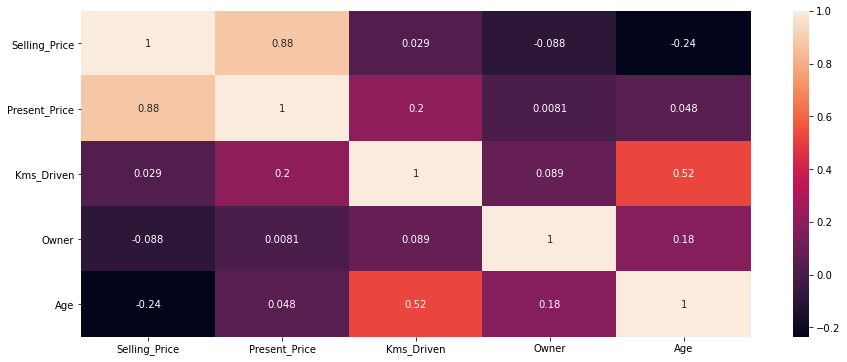

In [21]:
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [22]:
df=pd.get_dummies(df)

In [23]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Car_Name_Bajaj,Car_Name_Hero,Car_Name_Honda,Car_Name_Other,Car_Name_Royal,Car_Name_TVS,Car_Name_Yamaha,Car_Name_alto,Car_Name_amaze,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_eon,Car_Name_ertiga,Car_Name_etios,Car_Name_fortuner,Car_Name_grand,Car_Name_i20,Car_Name_innova,Car_Name_jazz,Car_Name_sx4,Car_Name_verna,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [24]:
df.shape

(301, 35)

In [25]:
X=df.drop("Selling_Price",axis=1)

In [26]:
y=df["Selling_Price"]

### Splitting data into training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (210, 34)
Train target shape   :  (210,)
Test features shape  :  (91, 34)
Test target shape    :  (91,)


##  Model Building (Linear Regression)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model_lm=LinearRegression()

In [32]:
model_lm.fit(X_train,y_train)

LinearRegression()

In [33]:
model_lm.coef_

array([ 3.81637147e-01, -2.81388496e-06, -8.19186939e-01, -3.86163242e-01,
       -1.21746997e-01,  2.16249062e-01, -4.27148603e-01,  8.33249147e-02,
        1.12544081e-01, -4.87776769e-01, -6.18662573e-01, -1.22836154e+00,
       -8.92662683e-01, -2.28332168e-01,  1.13052847e-01,  4.08359831e-01,
       -1.08021548e+00, -1.61282543e+00, -4.68052885e-02, -1.02163530e+00,
        3.44449574e+00, -2.85867527e-01, -2.54025495e-03,  3.74250073e+00,
       -1.67872834e-01, -1.15271537e-01,  2.17197776e-01, -1.12052679e+00,
        1.12571090e+00, -5.18410245e-03,  8.04673763e-01, -8.04673763e-01,
        3.93290744e-01, -3.93290744e-01])

In [34]:
y_pred=model_lm.predict(X_test)

# Interpret the model

Text(0, 0.5, 'Predictions Y')

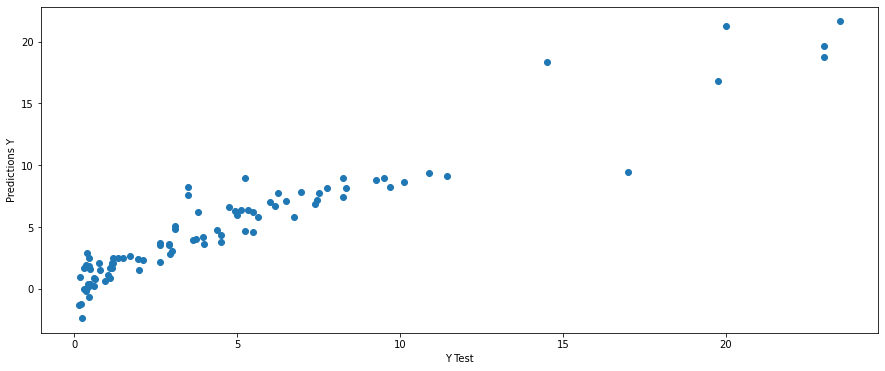

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predictions Y')

In [36]:
my_dict={"Actual":y_test,"Pred":y_pred,"residual":y_test-y_pred}

In [37]:
compare=pd.DataFrame(my_dict)

<AxesSubplot:>

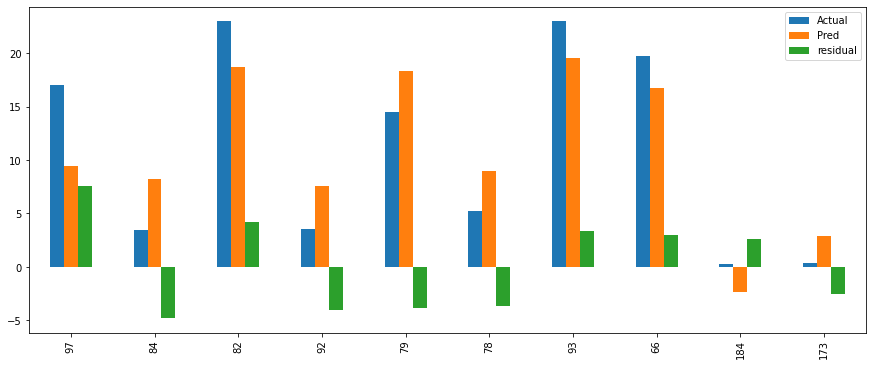

In [38]:
compare.sort_values(by='residual', key=lambda col: abs(col),ascending=False).head(10).plot(kind="bar")#Top 10 Max errors

<AxesSubplot:>

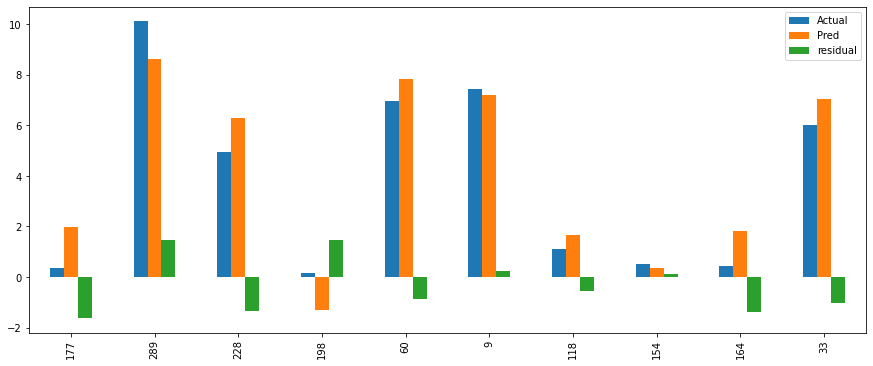

In [39]:
compare.head(10).plot(kind='bar')

In [40]:
compare.head()

,Actual,Pred,residual
177,0.35,1.961979,-1.611979
289,10.11,8.629623,1.480377
228,4.95,6.283890,-1.333890
198,0.15,-1.300156,1.450156
60,6.95,7.812898,-0.862898


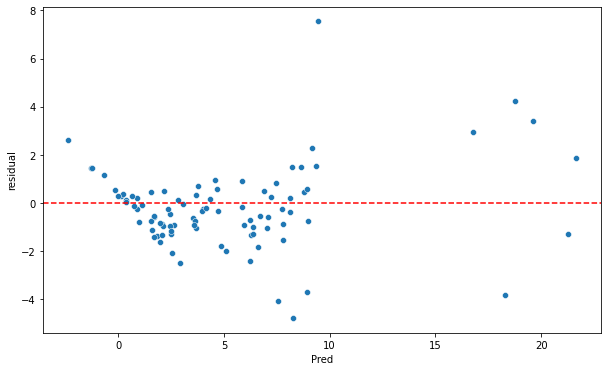

In [41]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = compare.Pred, y = compare.residual) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show()

<AxesSubplot:xlabel='residual', ylabel='Density'>

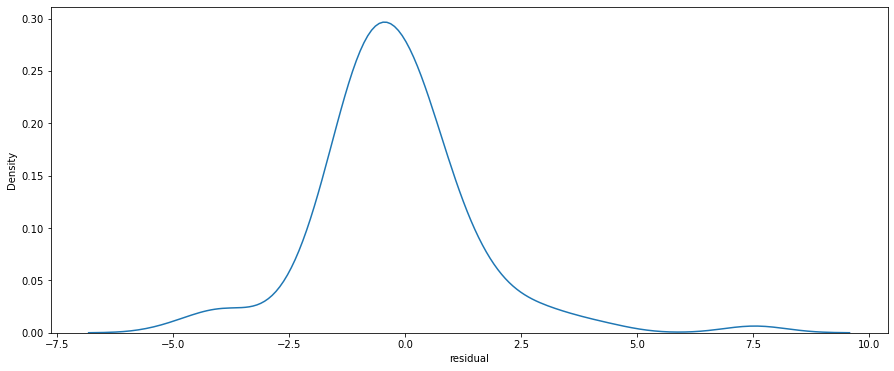

In [42]:
sns.kdeplot(compare.residual)

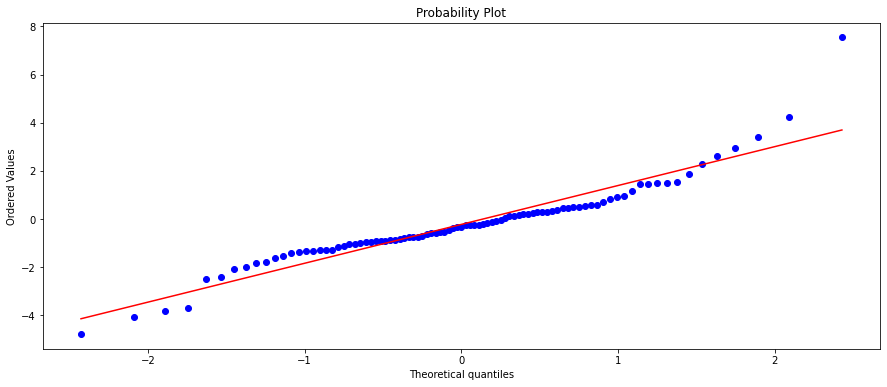

In [43]:
stats.probplot(compare.residual,dist="norm",plot=plt);

# Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [45]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [46]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9004177495488478
MAE 		: 1.1758386483217127
MSE 		: 2.835524973518067
RMSE 		: 1.6839017113590884


In [47]:
y_train_pred=model_lm.predict(X_train)


In [48]:
eval_metric(y_train,y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.91035474238707
MAE 		: 0.9767317618769246
MSE 		: 2.200130942982547
RMSE 		: 1.4832838376327528


In [49]:
def check_model(test,test_pred,train,train_pred):
    test_dict={}
    train_dict={} 
    metric=["rmse","mae","mse","R2"]
    for i in metric:
        test
    

In [50]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,1.483284,1.683902
mae,0.976732,1.175839
mse,2.200131,2.835525
R2,0.910355,0.900418


##### Above we can observe that, polynomial features affect badly our scores,so that we don't need to use

In [51]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors}, index=[i for i in range(1,d)])
        

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly(3)

,train_rmse_errors,test_rmse_errors
1,1.540867,1.786841
2,0.298719,5.764975


There is no need Polynomial features for linear Regression

# Regularization

In [53]:
df.corr().loc[:,"Selling_Price"]

Selling_Price             1.000000
Present_Price             0.878983
Kms_Driven                0.029187
Owner                    -0.088344
Age                      -0.236141
Car_Name_Bajaj           -0.245149
Car_Name_Hero            -0.194034
Car_Name_Honda           -0.203616
Car_Name_Other           -0.001922
Car_Name_Royal           -0.169553
Car_Name_TVS             -0.136727
Car_Name_Yamaha          -0.132819
Car_Name_alto            -0.057464
Car_Name_amaze           -0.013376
Car_Name_brio             0.003058
Car_Name_ciaz             0.097252
Car_Name_city             0.167118
Car_Name_corolla          0.105472
Car_Name_eon             -0.049501
Car_Name_ertiga           0.059406
Car_Name_etios           -0.017531
Car_Name_fortuner         0.538261
Car_Name_grand            0.009198
Car_Name_i20              0.003646
Car_Name_innova           0.280812
Car_Name_jazz             0.035495
Car_Name_sx4             -0.042241
Car_Name_verna            0.062962
Fuel_Type_CNG       

In [54]:
X_train

,Present_Price,Kms_Driven,Owner,Age,Car_Name_Bajaj,Car_Name_Hero,Car_Name_Honda,Car_Name_Other,Car_Name_Royal,Car_Name_TVS,Car_Name_Yamaha,Car_Name_alto,Car_Name_amaze,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_eon,Car_Name_ertiga,Car_Name_etios,Car_Name_fortuner,Car_Name_grand,Car_Name_i20,Car_Name_innova,Car_Name_jazz,Car_Name_sx4,Car_Name_verna,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
185,0.58,1900,0,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
72,18.61,56001,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
15,10.79,43000,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
10,3.60,2135,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
196,0.52,500000,0,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.57,18000,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
71,12.48,45000,0,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
106,3.45,16500,1,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
270,10.00,69341,0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


## Scaling

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
#scaler =  MinMaxScaler()



X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model_lm_scale=LinearRegression()
model_lm_scale.fit(X_train,y_train)
y_pred_scale=model_lm_scale.predict(X_test)
y_train_pred_scale=model_lm_scale.predict(X_train)

lm_scores_scale = {"lm_train_scale": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred_scale)),
    "mae" : mean_absolute_error(y_train, y_train_pred_scale),
    "mse" : mean_squared_error(y_train, y_train_pred_scale),
    "R2" : r2_score(y_train, y_train_pred_scale)}, 

    "lm_test_scale": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred_scale)),
    "mae" : mean_absolute_error(y_test, y_pred_scale),
    "mse" : mean_squared_error(y_test, y_pred_scale),
    "R2" : r2_score(y_test, y_pred_scale)}}
ls_scale =pd.DataFrame(lm_scores_scale)
ls_scale


,lm_train_scale,lm_test_scale
rmse,1.483285,5.196090e+11
mae,0.976513,3.538161e+11
mse,2.200136,2.699935e+23
R2,0.910355,-9.482038e+21


In [56]:
#pd.concat([ls,],axis=1)

###### As we observed after scaling our  model gives huge differences.There is no need Scaling according to my observation.Howewer with scaling we can observe ridge and lasso model effects

# Ridge

In [57]:
from sklearn.linear_model import Ridge


In [58]:
ridge_model=Ridge()##Default alpha=1

In [59]:
ridge_model.fit(X_train,y_train)

Ridge()

In [60]:
y_pred=ridge_model.predict(X_test)

In [61]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,1.483284,1.713616
mae,0.976732,1.190366
mse,2.200131,2.936480
R2,0.910355,0.896872


In [62]:
pd.concat([ls,ls_scale, rs], axis=1)
#pd.concat([ls, rs], axis=1)

,lm_train,lm_test,lm_train_scale,lm_test_scale,ridge_train,ridge_test
rmse,1.483284,1.683902,1.483285,5.196090e+11,1.483284,1.713616
mae,0.976732,1.175839,0.976513,3.538161e+11,0.976732,1.190366
mse,2.200131,2.835525,2.200136,2.699935e+23,2.200131,2.936480
R2,0.910355,0.900418,0.910355,-9.482038e+21,0.910355,0.896872


# Lasso

In [63]:
from sklearn.linear_model import Lasso

In [64]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [65]:
y_train_pred=lasso_model.predict(X_train)

In [66]:
y_pred = lasso_model.predict(X_test)

In [67]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2.366553,2.664278
mae,1.576439,1.721210
mse,5.600575,7.098375
R2,0.771802,0.750709


In [68]:
pd.concat([ls_scale, rs, lss], axis = 1)

,lm_train_scale,lm_test_scale,ridge_train,ridge_test,lasso_train,lasso_test
rmse,1.483285,5.196090e+11,1.483284,1.713616,2.366553,2.664278
mae,0.976513,3.538161e+11,0.976732,1.190366,1.576439,1.721210
mse,2.200136,2.699935e+23,2.200131,2.936480,5.600575,7.098375
R2,0.910355,-9.482038e+21,0.910355,0.896872,0.771802,0.750709


## Elastic-Net 

In [69]:
from sklearn.linear_model import ElasticNet

In [70]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [71]:
y_train_pred = elastic_model.predict(X_train)
y_pred = elastic_model.predict(X_test)

In [72]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,2.331011,2.670777
mae,1.514351,1.610137
mse,5.433612,7.133050
R2,0.778605,0.749491


In [73]:
pd.concat([ls_scale,rs, lss, es], axis = 1)

,lm_train_scale,lm_test_scale,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test
rmse,1.483285,5.196090e+11,1.483284,1.713616,2.366553,2.664278,2.331011,2.670777
mae,0.976513,3.538161e+11,0.976732,1.190366,1.576439,1.721210,1.514351,1.610137
mse,2.200136,2.699935e+23,2.200131,2.936480,5.600575,7.098375,5.433612,7.133050
R2,0.910355,-9.482038e+21,0.910355,0.896872,0.771802,0.750709,0.778605,0.749491


###### As we observed, we need cross validation to improve our scores

In [74]:
from sklearn.linear_model import RidgeCV,LassoCV

In [75]:
alpha_space = np.linspace(0.01, 20, 100)


In [76]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 20, scoring = "neg_root_mean_squared_error")

In [77]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 2.11919192e-01, 4.13838384e-01, 6.15757576e-01,
       8.17676768e-01, 1.01959596e+00, 1.22151515e+00, 1.42343434e+00,
       1.62535354e+00, 1.82727273e+00, 2.02919192e+00, 2.23111111e+00,
       2.43303030e+00, 2.63494949e+00, 2.83686869e+00, 3.03878788e+00,
       3.24070707e+00, 3.44262626e+00, 3.64454545e+00, 3.84646465e+00,
       4.04838384e+00, 4.25030303e+0...
       1.53558586e+01, 1.55577778e+01, 1.57596970e+01, 1.59616162e+01,
       1.61635354e+01, 1.63654545e+01, 1.65673737e+01, 1.67692929e+01,
       1.69712121e+01, 1.71731313e+01, 1.73750505e+01, 1.75769697e+01,
       1.77788889e+01, 1.79808081e+01, 1.81827273e+01, 1.83846465e+01,
       1.85865657e+01, 1.87884848e+01, 1.89904040e+01, 1.91923232e+01,
       1.93942424e+01, 1.95961616e+01, 1.97980808e+01, 2.00000000e+01]),
        cv=20, scoring='neg_root_mean_squared_error')

In [78]:
y_pred = ridge_cv_model.predict(X_test)

In [79]:
y_train_pred = ridge_cv_model.predict(X_train)

In [80]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.489563,1.731998
mae,0.975743,1.195767
mse,2.218798,2.999818
R2,0.909594,0.894648


In [81]:
ridge_cv_model.alpha_

6.471414141414141

In [82]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [83]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 2.11919192e-01, 4.13838384e-01, 6.15757576e-01,
       8.17676768e-01, 1.01959596e+00, 1.22151515e+00, 1.42343434e+00,
       1.62535354e+00, 1.82727273e+00, 2.02919192e+00, 2.23111111e+00,
       2.43303030e+00, 2.63494949e+00, 2.83686869e+00, 3.03878788e+00,
       3.24070707e+00, 3.44262626e+00, 3.64454545e+00, 3.84646465e+00,
       4.04838384e+00, 4.25030303e+0...
       1.53558586e+01, 1.55577778e+01, 1.57596970e+01, 1.59616162e+01,
       1.61635354e+01, 1.63654545e+01, 1.65673737e+01, 1.67692929e+01,
       1.69712121e+01, 1.71731313e+01, 1.73750505e+01, 1.75769697e+01,
       1.77788889e+01, 1.79808081e+01, 1.81827273e+01, 1.83846465e+01,
       1.85865657e+01, 1.87884848e+01, 1.89904040e+01, 1.91923232e+01,
       1.93942424e+01, 1.95961616e+01, 1.97980808e+01, 2.00000000e+01]),
        cv=10, max_iter=100000)

In [84]:
lasso_cv_model.alpha_

0.21191919191919192

In [85]:
y_train_pred = lasso_cv_model.predict(X_train)

In [86]:
y_pred = lasso_cv_model.predict(X_test)

In [87]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,1.627887,1.863623
mae,1.082447,1.216313
mse,2.650015,3.473089
R2,0.892024,0.878027


#### WITH SCALING

In [88]:
pd.concat([ls_scale,rs, rcs, lss, lcs], axis = 1) ##FINAL SCORE

,lm_train_scale,lm_test_scale,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,1.483285,5.196090e+11,1.483284,1.713616,1.489563,1.731998,2.366553,2.664278,1.627887,1.863623
mae,0.976513,3.538161e+11,0.976732,1.190366,0.975743,1.195767,1.576439,1.721210,1.082447,1.216313
mse,2.200136,2.699935e+23,2.200131,2.936480,2.218798,2.999818,5.600575,7.098375,2.650015,3.473089
R2,0.910355,-9.482038e+21,0.910355,0.896872,0.909594,0.894648,0.771802,0.750709,0.892024,0.878027


#### WITHOUT SCALING

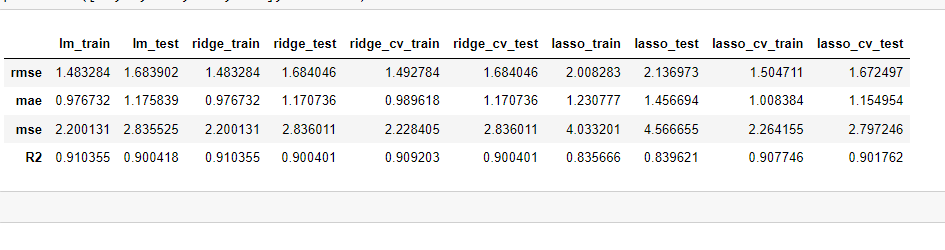

###### The results below are obtained the data features without Car_Name feature, and Year is taken as given, Howewer above results are obtained after some featuring that is Car_name column and Year column are reorganized


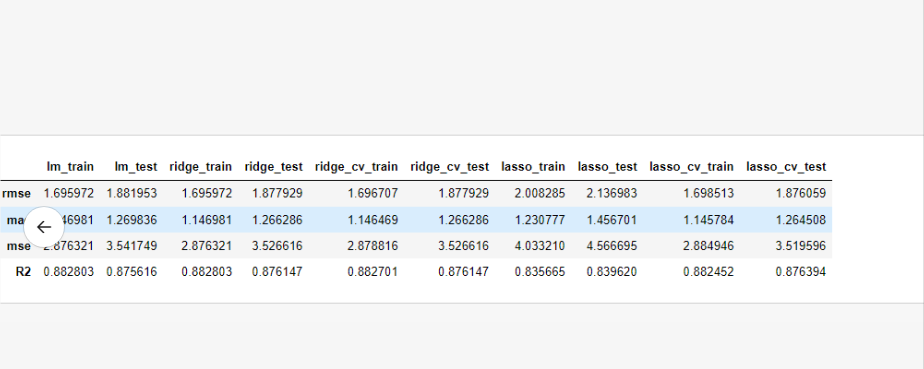


#### OBSERVATIONS

According to my prediction,for this data Linear Regression with degree=1 is the best choice since when we increase degree, Although the train error is decreased, there is big error observed in the y_yest.Howewer, we need some regularization to improve our scores so that polynomial features is used first with selection of the degree which is 2 but after scoring,ı determine there is no need to polynomialfeatures. then ridge,lasso, elasticnet are used at the last with scaling data I need to use  crossvalidation for lasso and ridge with the best choice of the alpha value.The comparison of the results is above.

At the end for this data, linear regression without scaling is the best choice. With adding Car_name column, our features are increased but the rmse and R2 scores are better.